In [1]:
import dolfin as df
import matplotlib.pyplot as plt

In [2]:
mesh = df.UnitSquareMesh(20, 20)

In [3]:
V = df.VectorElement("Lagrange", mesh.ufl_cell(), 2)
P = df.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
VP = df.MixedElement([V, P])
W = df.FunctionSpace(mesh, VP)

u, p = df.TrialFunctions(W)
v, q = df.TestFunctions(W)

In [4]:
def a(u, v):
    return df.inner(df.nabla_grad(u), df.nabla_grad(v))*df.dx

def b(v, p):
    return p * df.div(v) * df.dx

mu = df.Constant(1.0)
f = df.Constant((0.0, 0.0))

A = mu * a(u, v) + b(v, p) + b(u, q)
L = df.dot(f, v) * df.dx

In [5]:
u0 = df.Constant((1., 0.))
noslip = df.Constant((0., 0.))

In [6]:
def top(x, on_boundary):
    return on_boundary and x[1] > 1.0-df.DOLFIN_EPS

def wall(x, on_boundary):
    return on_boundary and x[1] <= 1.0-df.DOLFIN_EPS

bc_top = df.DirichletBC(W.sub(0), u0, top)
bc_wall = df.DirichletBC(W.sub(0), noslip, wall)
bc_p = df.DirichletBC(W.sub(1), df.Constant(0.), "x[0] < DOLFIN_EPS && x[1] < DOLFIN_EPS", "pointwise")
bcs = [bc_top, bc_wall, bc_p]

In [7]:
w = df.Function(W)
df.solve(A == L, w, bcs)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.


In [8]:
u_, p_ = df.split(w)

Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


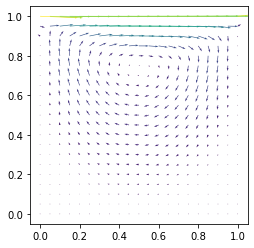

In [9]:
df.plot(u_)


Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


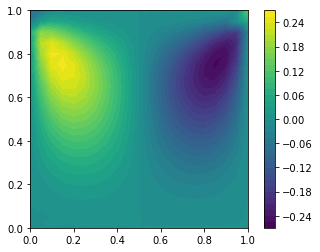

In [10]:
fig = df.plot(u_[1])
plt.colorbar(fig)

Object cannot be plotted directly, projecting to piecewise linears.Calling FFC just-in-time (JIT) compiler, this may take some time.



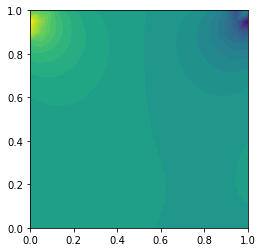

In [11]:
df.plot(p_)